In [60]:
import pandas as pd

whiskey=pd.read_csv('whiskies.txt')
whiskey['Region']=pd.read_csv('regions.txt')
a=pd.read_csv('regions.txt')
whiskey=whiskey.drop('RowID',axis=1)
whiskey=whiskey.set_index('Distillery')
whiskey.head()


,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
Distillery,,,,,,,,,,,,,,,,
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [61]:
flavors = whiskey.iloc[:, 2:14]
corr_flavors = pd.DataFrame.corr(flavors)
print(corr_flavors)

              Smoky  Medicinal   Tobacco     Honey     Spicy     Winey  \
Smoky      1.000000   0.686071  0.365501 -0.195318  0.231745 -0.028190   
Medicinal  0.686071   1.000000  0.425106 -0.396629  0.044903 -0.202651   
Tobacco    0.365501   0.425106  1.000000 -0.275490  0.054068  0.009097   
Honey     -0.195318  -0.396629 -0.275490  1.000000  0.139563  0.362021   
Spicy      0.231745   0.044903  0.054068  0.139563  1.000000  0.092704   
Winey     -0.028190  -0.202651  0.009097  0.362021  0.092704  1.000000   
Nutty     -0.023132  -0.113671 -0.117717  0.188492 -0.042856  0.198467   
Malty     -0.192875  -0.258959 -0.059347  0.310184  0.036303  0.112368   
Fruity    -0.312970  -0.330975 -0.235145  0.108822  0.144714  0.090694   
Floral    -0.431663  -0.511323 -0.212375  0.183029  0.034663 -0.126932   
 Latitude -0.435433  -0.670450 -0.094500  0.222169 -0.016999  0.227778   

              Nutty     Malty    Fruity    Floral   Latitude  
Smoky     -0.023132 -0.192875 -0.312970 -0.43166

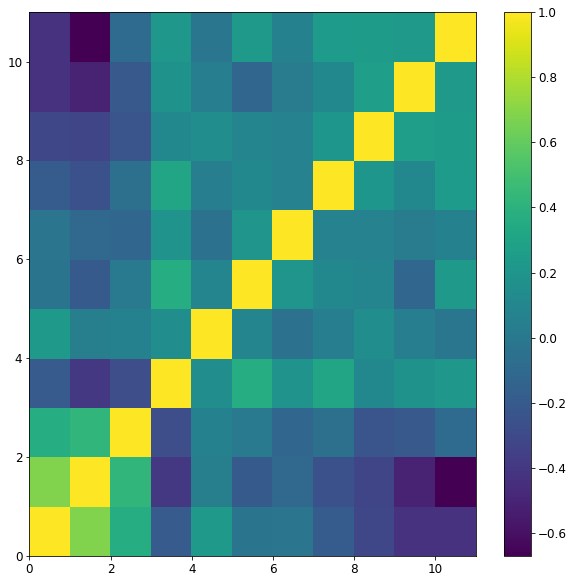

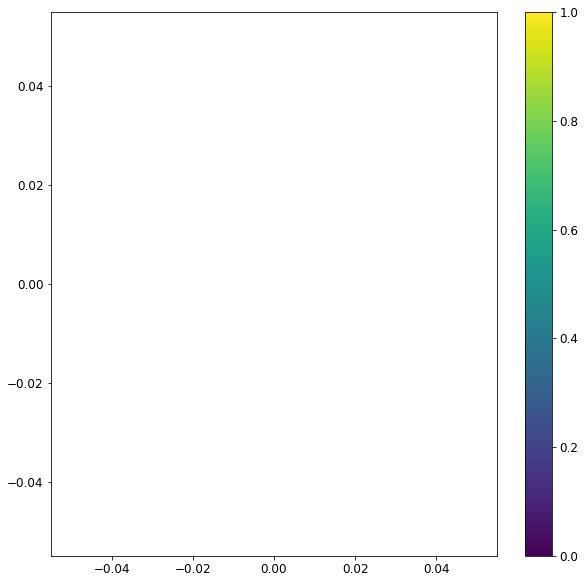

In [62]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10, 10))
plt.pcolor(corr_flavors)
plt.colorbar()
     #>>>plt.savefig("corlate-whisky1.pdf")
 
corr_whiskey = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10, 10))
plt.pcolor(corr_whiskey)
plt.axis("tight")
plt.colorbar()
     #>>>plt.savefig("corlate-whisky2.pdf")
 
plt.show()


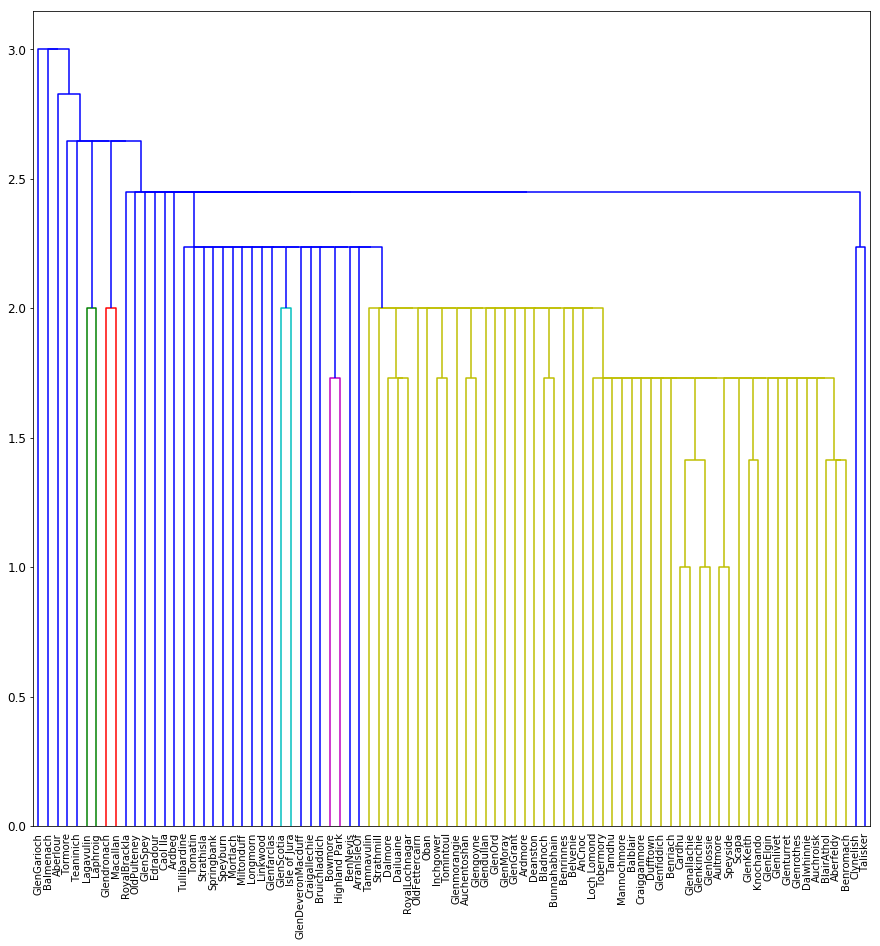

In [63]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(whiskey.iloc[:,:12],method='single')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(15,15))
dendrogram(mergings,
           labels=whiskey.index,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.show()

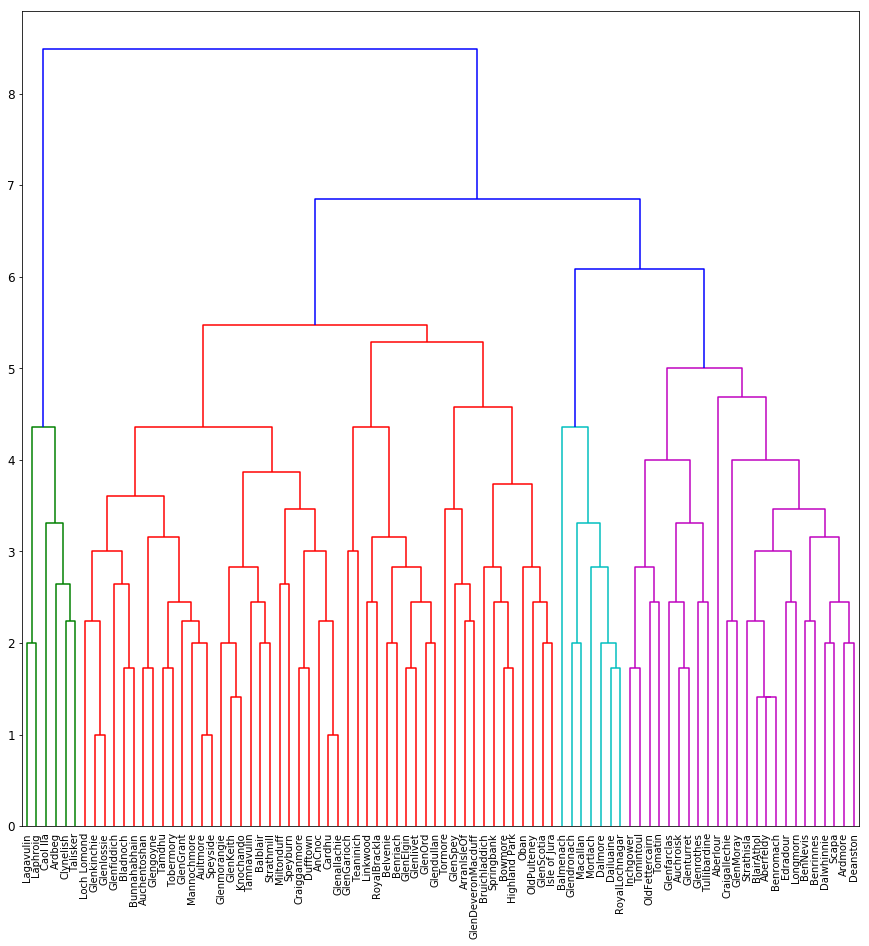

In [64]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(whiskey.iloc[:,:12],method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(15,15))
dendrogram(mergings,
           labels=whisky.index,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()


In [65]:

from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings,6,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'Region': whiskey['Region']})

# Create crosstab: ct
ct1 = pd.crosstab(df['labels'],df['Region'])

# Display ct
print(ct1)


Region  Campbelltown  Highlands  Islands  Islay  Lowlands  Speyside
labels                                                             
1                  0          1        1      4         0         0
2                  2         10        4      3         3        27
3                  0          3        0      0         0         4
4                  0         11        1      0         0        12


In [66]:
pd.set_option('display.max_rows', len(df))
print(df.sort_values('labels'))

                          Region  labels
Distillery                              
Talisker                 Islands       1
Ardbeg                     Islay       1
Caol Ila                   Islay       1
Laphroig                   Islay       1
Lagavulin                  Islay       1
Clynelish              Highlands       1
Glenfiddich             Speyside       2
Glendullan              Speyside       2
Tormore                 Speyside       2
GlenElgin               Speyside       2
Glengoyne              Highlands       2
GlenScotia          Campbelltown       2
GlenOrd                Highlands       2
Speyburn                Speyside       2
GlenKeith               Speyside       2
Glenallachie            Speyside       2
GlenSpey                Speyside       2
Glenlivet               Speyside       2
GlenGrant               Speyside       2
Glenlossie              Speyside       2
Glenmorangie           Highlands       2
RoyalBrackla            Speyside       2
Highland Park   

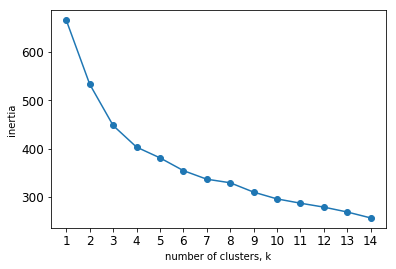

In [67]:
from sklearn.cluster import KMeans

ks = range(1, 15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(whiskey.iloc[:,:12])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [68]:
model=KMeans(n_clusters=4)
model.fit(whiskey.iloc[:,:12])
Whiskey_Clusters=model.predict(whiskey.iloc[:,:12])
df['labels']=Whiskey_Clusters
# Create crosstab: ct
ct2 = pd.crosstab(df['labels'],df['Region'])

# Display ct
print('Groups from Hierarchical Clustering')
print(ct1)
print('Groups from K-Means')
print(ct2)
print(df.sort_values('labels'))

Groups from Hierarchical Clustering
Region  Campbelltown  Highlands  Islands  Islay  Lowlands  Speyside
labels                                                             
1                  0          1        1      4         0         0
2                  2         10        4      3         3        27
3                  0          3        0      0         0         4
4                  0         11        1      0         0        12
Groups from K-Means
Region  Campbelltown  Highlands  Islands  Islay  Lowlands  Speyside
labels                                                             
0                  0          7        2      1         3        23
1                  0         10        1      0         0        18
2                  0          1        1      4         0         0
3                  2          7        2      2         0         2
                          Region  labels
Distillery                              
Tullibardine           Highlands       0
Gleng

{'Islands', 'Lowlands', 'Speyside', 'Islay', 'Highlands', 'Campbelltown'}


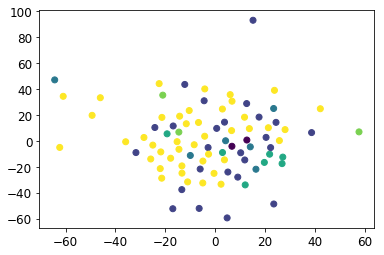

In [69]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
          ('tsne', TSNE(learning_rate=200))]

pipeline = Pipeline(steps)

tsne_features = pipeline.fit_transform(whiskey.iloc[:,:12])

xs = tsne_features[:,0]
ys = tsne_features[:,1]
regions=list(whiskey.Region)
region_colors=[]
for place in regions:
    if place=='Campbelltown':
        region_colors.append(1)
    elif place=='Highlands':
        region_colors.append(2)
    elif place=='Islands':
        region_colors.append(3)
    elif place=='Islay':
        region_colors.append(4)
    elif place=='Lowlands':
        region_colors.append(5)
    elif place=='Speyside':
        region_colors.append(6)
print(set(regions))

plt.scatter(xs,ys,c=region_colors)
plt.show()


In [70]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(whiskey.iloc[:,:12])

# Transform the articles: nmf_features
nmf_features = model.transform(whiskey.iloc[:,:12])

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features,index=whiskey.index)

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_,columns=list(whiskey.iloc[:,:12]))


# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=whisky.index)

# Select the row corresponding to 'Cristiano Ronaldo': article
scotch = df.loc['Oban']

# Compute the dot products: similarities
similarities = df.dot(scotch)

# Display those with the largest cosine similarity
print(similarities.nlargest())


Distillery
Oban           1.000000
OldPulteney    0.961219
Clynelish      0.946947
Talisker       0.915929
Balblair       0.909777
dtype: float64


In [71]:
from sklearn.pipeline import make_pipeline

nmf = NMF(n_components=6)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(whiskey.iloc[:,:12])

df = pd.DataFrame(norm_features,index=whiskey.index)

# Select row of 'Bruce Springsteen': artist
oban = df.loc['Oban']

# Compute cosine similarities: similarities
similarities = df.dot(oban)

# Display those with highest cosine similarity
print(similarities.nlargest())

Distillery
Oban           1.000000
OldPulteney    0.961760
Clynelish      0.946897
Talisker       0.915812
Balblair       0.909778
dtype: float64


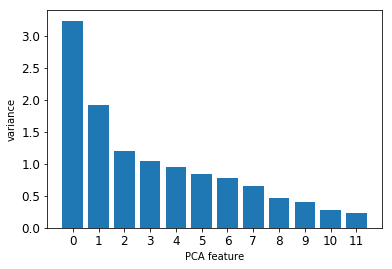

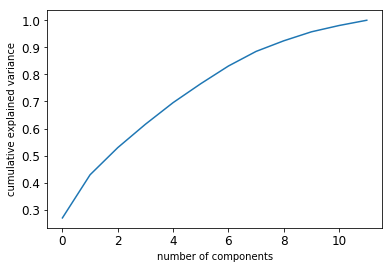

In [72]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler=StandardScaler()
pca=PCA()

pipeline = make_pipeline(scaler,pca)

pipeline.fit(whiskey.iloc[:,:12])

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [73]:
nmf = NMF(n_components=12)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(whiskey.iloc[:,:12])

df = pd.DataFrame(norm_features,index=whiskey.index)

# Select row of 'Bruce Springsteen': artist
oban = df.loc['Oban']

# Compute cosine similarities: similarities
similarities = df.dot(oban)

# Display those with highest cosine similarity
print(similarities.nlargest())

Distillery
Oban          1.000000
Balblair      0.961680
Clynelish     0.960359
Talisker      0.941819
Strathmill    0.931555
dtype: float64
